In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from utils import model
from utils import processing_functions
import joblib
import matplotlib.pyplot as plt


# Load trained model

In [2]:
pitch_model = tf.keras.models.load_model('../trained_models/pitch_model/model')

# Load Data

In [83]:
# get pitch dataframe
df = processing_functions.get_pitch_table()
df['label'] = df['pitch'].isin(['CU','SL','CH','KC','FC','EP'])*1
df['month'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.strftime('%Y-%m')
df = df.loc[df['date']>'2017-05-01']

# get a sample
df_sample = df.sample(1000).reset_index()


# pull images
X_image_data = processing_functions.get_images(df_sample['pitch_id'].values)

# create meta_data from the saved encovder
enc = joblib.load('../trained_models/pitch_model/metadata_processor.joblib')
X_meta_data = enc.transform(df_sample[['batter','month']])

# Create predictions

In [84]:
df_sample['pred'] = pitch_model.predict([X_image_data, X_meta_data])[:,0]

# Plot a histogram of the predictions

(array([ 67., 100., 133., 221., 208.,  98.,  23.,  21.,  22.,   4.,   4.,
          9.,  34.,  42.,  14.]),
 array([0.23188746, 0.27920717, 0.32652688, 0.3738466 , 0.42116627,
        0.46848598, 0.5158057 , 0.56312543, 0.6104451 , 0.6577648 ,
        0.7050845 , 0.7524042 , 0.7997239 , 0.84704363, 0.89436334,
        0.94168305], dtype=float32),
 <BarContainer object of 15 artists>)

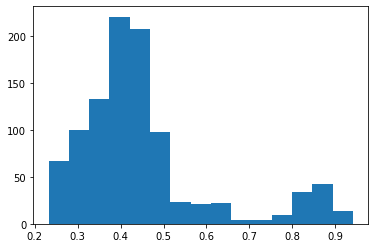

In [87]:
plt.hist(df_sample['pred'],bins = 15)

# Plot the at-bats with the highest predictions

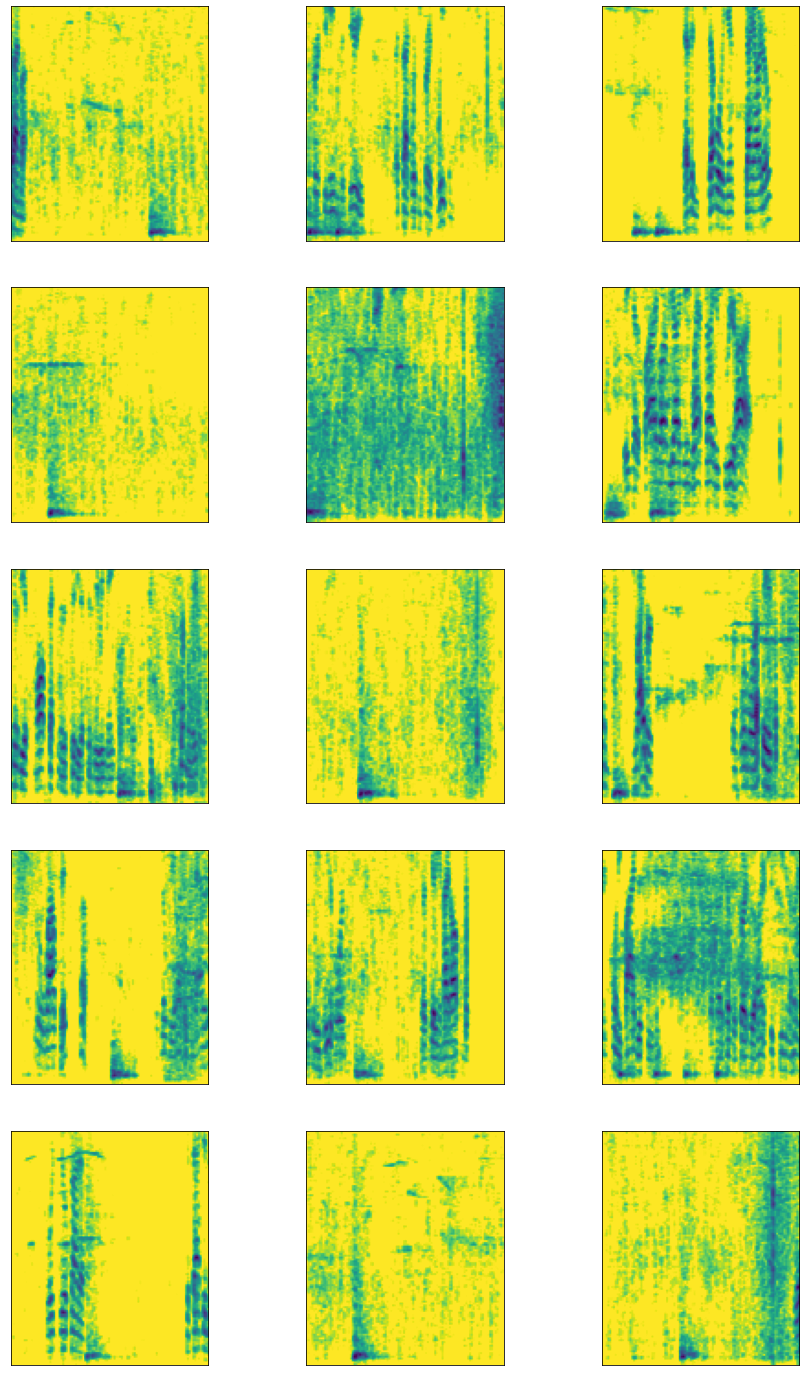

In [88]:

high_preds = df_sample.sort_values('pred', ascending=False)[:15]

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15,25),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axs.flat):
    ind = high_preds.iloc[i].name
    ax.imshow(X_image_data[ind].astype(float))

In [91]:
high_preds

# https://www.mlb.com/video/00u7yc7ivV9ndZQst356/reels/highest-offspeed-predictions

,index,pitch,pitcher,speed,video_id,batter,count,date,dist,exit_velocty,inning,launch_angle,mph,pitch_id,pitch_result,spin_rate,zone,label,month,pred
479,14452,CU,"Jackson, Edwin",NaN,NaN,"Marisnick, Jake",0-0,2017-08-23,NaN,NaN,Bot 5,NaN,78.4,aad578bd-7bbc-4a4d-822f-c3fb1575c985,ball,2532.0,14.0,1,2017-08,0.941683
772,346,CH,"Strasburg, Stephen",NaN,NaN,"Springer, George",1-2,2017-08-24,124.0,72.9,Bot 6,74.0,89.4,d4d435de-78bd-415e-a13d-459825f9a561,foul,1524.0,13.0,1,2017-08,0.935106
89,11653,FF,"Gallardo, Yovani",NaN,NaN,"Gattis, Evan",1-0,2017-09-15,NaN,NaN,Bot 6,NaN,92.4,e2e16c12-ea8d-4ccd-83f9-83040c9fb23e,ball,2193.0,14.0,0,2017-09,0.931041
509,344,CU,"Strasburg, Stephen",NaN,NaN,"Springer, George",2-2,2017-08-24,303.0,86.9,Bot 6,27.0,83.1,85d275bb-ebb4-41f3-8570-bedca2ef0ac0,foul,2953.0,5.0,1,2017-08,0.923991
867,14496,SL,"Stroman, Marcus",NaN,NaN,"Marisnick, Jake",3-2,2017-08-06,NaN,NaN,Bot 6,NaN,85.7,18a329be-93f6-4692-b8ff-43fed35bdbb9,swinging_strike,2516.0,3.0,1,2017-08,0.912756
94,14573,SL,"Cishek, Steve",NaN,NaN,"Marisnick, Jake",2-2,2017-08-01,NaN,NaN,Bot 7,NaN,78.6,1dbe03e9-4881-4b39-89ce-79a633ecb993,ball,2365.0,14.0,1,2017-08,0.910719
307,23672,CH,"Milone, Tommy",NaN,NaN,"Davis, J.D.",3-2,2017-09-02,4.0,75.3,Bot 3,-24.0,80.6,5558a192-345c-4ff5-b1af-1a182dc67e57,hit_into_play,1402.0,9.0,1,2017-09,0.907333
349,23915,CH,"Cotton, Jharel",NaN,NaN,"Centeno, Juan",0-1,2017-08-20,NaN,NaN,Bot 5,NaN,76.4,d243e2de-2659-478a-8eff-9fd1b728d12b,ball,2428.0,13.0,1,2017-08,0.907213
989,16830,FC,"Colomé, Alex",NaN,NaN,"Beltrán, Carlos",2-1,2017-08-01,NaN,NaN,Bot 9,NaN,89.1,89aa5824-a2bf-4fb4-be70-c16fbc1ba0a1,swinging_strike,2197.0,5.0,1,2017-08,0.905523
741,13716,SL,"Severino, Luis",NaN,NaN,"Gurriel, Yuli",1-0,2017-07-02,NaN,NaN,Bot 2,NaN,86.8,d75dc64b-72f1-485b-a2d1-29fe6bc780ce,called_strike,2650.0,6.0,1,2017-07,0.905344
